In [1]:
# Carga del dataset
from numpy import loadtxt
dataset = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', delimiter=',')

In [2]:
# Transformamos a dataframe de pandas
import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Red Neuronal Keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam

# Dividimos los datos en variables de entrada X y de salida Y
X = data.drop('Outcome', axis=1)  # Variables independientes
y = data['Outcome']  # Variable dependiente

# Separamos los datos en conjuntos de prueba y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Construir el modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Una neurona de salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_normalized, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_normalized, y_test, verbose=0)
print(f"Accuracy: {accuracy * 100:.2f}%")




Epoch 1/20


20/20 [==============================] - 1s 1ms/step - loss: 0.5953 - accuracy: 0.7199
Epoch 2/20
20/20 [==============================] - 0s 895us/step - loss: 0.4919 - accuracy: 0.7492
Epoch 3/20
20/20 [==============================] - 0s 895us/step - loss: 0.4532 - accuracy: 0.7769
Epoch 4/20
20/20 [==============================] - 0s 842us/step - loss: 0.4352 - accuracy: 0.7932
Epoch 5/20
20/20 [==============================] - 0s 842us/step - loss: 0.4280 - accuracy: 0.7883
Epoch 6/20
20/20 [==============================] - 0s 790us/step - loss: 0.4184 - accuracy: 0.7915
Epoch 7/20
20/20 [==============================] - 0s 790us/step - loss: 0.4217 - accuracy: 0.7964
Epoch 8/20
20/20 [==============================] - 0s 790us/step - loss: 0.4151 - accuracy: 0.8078
Epoch 9/20
20/20 [==============================] - 0s 795us/step - loss: 0.4063 - accuracy: 0.8029
Epoch 10/20
20/20 [==============================] - 0s 790us/step - loss: 0.4005 - accuracy: 0.80

5/5 [==============================] - 0s 750us/step


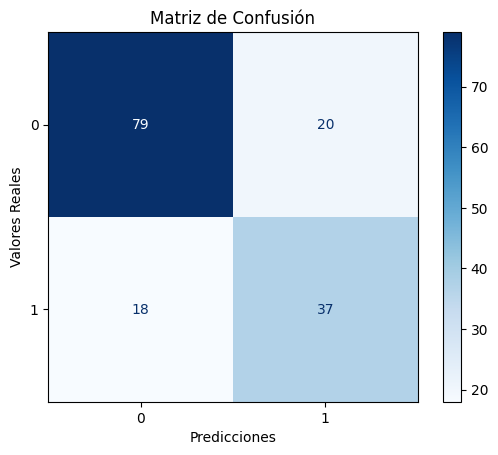

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo como probabilidades
y_pred = model.predict(X_test_normalized)

# Convertir probabilidades a clases binarias (0 o 1)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()



In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Obtener las predicciones del modelo como probabilidades
y_pred = model.predict(X_test_normalized)

# Convertir probabilidades a clases binarias (0 o 1)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Calcular especificidad
tn, fp, fn, tp = cm.ravel()  # Extraer valores de la matriz de confusión
specificity = tn / (tn + fp)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)  # Sensibilidad
f1 = f1_score(y_test, y_pred_classes)

# Imprimir resultados
print(f"Accuracy: {accuracy * 100:.1f}%")
print(f"Precisión: {precision * 100:.1f}%")
print(f"Sensibilidad (Recall): {recall * 100:.1f}%")
print(f"Especificidad: {specificity * 100:.1f}%")
print(f"Medida F1: {f1 * 100:.1f}%")


5/5 [==============================] - 0s 750us/step
Accuracy: 75.3%
Precisión: 64.9%
Sensibilidad (Recall): 67.3%
Especificidad: 79.8%
Medida F1: 66.1%
